## 1 Ano de dados

In [1]:
url = "http://vps-40d69db1.vps.ovh.ca:23002/api/CotacaoIntradayAcaoResultadoValors/obtemDatasPorDataGrupoLimite?diaInicioNum=20211101&diaFinalNum=20220430&grupoAcaoId=12&limiteDiaRegra=260"

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [3]:
r = requests.get(url)
j = r.json()
df = pd.DataFrame.from_dict(j)

In [4]:
df.head()

,anoMesNum,ticker,codigoRegraProjecao,target,stop,totalLucro,totalPrejuizo,mediaDias
0,202111,ABEV3,t09s15vy,0.09,0.15,300,0,15.0833
1,202111,ABEV3,t10s15vy,0.10,0.15,300,0,17.1533
2,202111,ABEV3,t10s17vy,0.10,0.17,300,0,17.1533
3,202111,ABEV3,t12s17vy,0.12,0.17,300,0,25.0000
4,202111,ABEV3,t15s12vy,0.15,0.12,300,0,38.1633


## Cálculo de Saldo

In [27]:
df['saldo'] =(df['target'] * df['totalLucro']) - (df['stop'] * df['totalPrejuizo'])

In [28]:
df.head()

,anoMesNum,ticker,codigoRegraProjecao,target,stop,totalLucro,totalPrejuizo,mediaDias,saldo
0,202103,ABEV3,t09s15vy,0.09,0.15,0,345,41.9449,-51.75
1,202103,ABEV3,t10s15vy,0.10,0.15,0,345,41.9449,-51.75
2,202103,ABEV3,t10s17vy,0.10,0.17,0,345,47.0261,-58.65
3,202103,ABEV3,t12s15vy,0.12,0.15,0,345,41.9449,-51.75
4,202103,ABEV3,t12s17vy,0.12,0.17,0,345,47.0261,-58.65


In [29]:
dfABEV = df[df['ticker'] == 'ABEV3']

In [30]:
dfABEV

,anoMesNum,ticker,codigoRegraProjecao,target,stop,totalLucro,totalPrejuizo,mediaDias,saldo
0,202103,ABEV3,t09s15vy,0.09,0.15,0,345,41.9449,-51.75
1,202103,ABEV3,t10s15vy,0.10,0.15,0,345,41.9449,-51.75
2,202103,ABEV3,t10s17vy,0.10,0.17,0,345,47.0261,-58.65
3,202103,ABEV3,t12s15vy,0.12,0.15,0,345,41.9449,-51.75
4,202103,ABEV3,t12s17vy,0.12,0.17,0,345,47.0261,-58.65
...,...,...,...,...,...,...,...,...,...
9739,202202,ABEV3,t13s17vy,0.13,0.17,53,0,14.1321,6.89
9740,202202,ABEV3,t14s17vy,0.14,0.17,19,0,13.5263,2.66
9741,202202,ABEV3,t15s12vy,0.15,0.12,12,0,14.3333,1.80
9742,202202,ABEV3,t15s15vy,0.15,0.15,8,0,13.0000,1.20


In [31]:
dfAgrupado = df\
        .groupby(['anoMesNum','codigoRegraProjecao','target','stop']).sum(['totalLucro','totalPrejuizo'])\
        .filter(items=['totalLucro','totalPrejuizo'])

In [32]:
dfAgrupado = dfAgrupado.reset_index()

In [33]:
dfAgrupado['saldo'] =(dfAgrupado['target'] * dfAgrupado['totalLucro']) - (dfAgrupado['stop'] * dfAgrupado['totalPrejuizo'])

In [34]:
dfAgrupado['total'] = dfAgrupado['totalLucro'] + dfAgrupado['totalPrejuizo']

In [35]:
dfAgrupado.head()

,anoMesNum,codigoRegraProjecao,target,stop,totalLucro,totalPrejuizo,saldo,total
0,202103,t09s15vy,0.09,0.15,12302,18619,-1685.67,30921
1,202103,t10s15vy,0.10,0.15,11571,19292,-1736.70,30863
2,202103,t10s17vy,0.10,0.17,12564,18280,-1851.20,30844
3,202103,t12s15vy,0.12,0.15,10308,20355,-1816.29,30663
4,202103,t12s17vy,0.12,0.17,11295,19226,-1913.02,30521


In [36]:
dfMelhores = df\
            .filter(items=['codigoRegraProjecao','saldo'])\
            .groupby('codigoRegraProjecao').agg({'saldo' : np.sum })

In [37]:
dfMelhores.sort_values('saldo')

,saldo
codigoRegraProjecao,
t09s15vy,5352.93
t10s15vy,5951.05
t15s12vy,6741.96
t12s15vy,6791.82
t10s17vy,6925.60
t12s17vy,8219.75
t15s15vy,8368.05
t13s17vy,8942.70
t14s17vy,9475.38


# Visualização dos Melhores Casos

In [38]:
dfTop5 = dfAgrupado\
        .filter(items=['anoMesNum','codigoRegraProjecao','saldo'])
dfTop5 = dfTop5[(dfTop5['codigoRegraProjecao']=='t10s17vy') | (dfTop5['codigoRegraProjecao']=='t12s17vy')  
       | (dfTop5['codigoRegraProjecao']=='t14s17vy')]
#dfTop5 =dfTop5.set_index(['anoMesNum'Projecao'])

In [39]:
dfTop5 = dfTop5.pivot_table(values='saldo',index='anoMesNum',columns='codigoRegraProjecao')

In [40]:
dfTop5 = dfTop5.reset_index()

In [41]:
dfTop5['anoMesNum'] = dfTop5['anoMesNum'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

<AxesSubplot:xlabel='anoMesNum'>

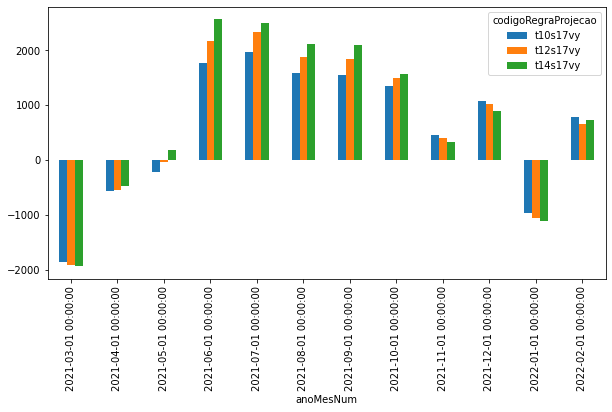

In [43]:
dfTop5.plot.bar(x="anoMesNum", y=["t10s17vy","t12s17vy","t14s17vy"], 
             figsize=(10,5))

# Qual combinação gera mais segurança ao longo do tempo ?

In [49]:
dTotais = df\
            .filter(items=['codigoRegraProjecao','totalLucro' , 'totalPrejuizo'])\
            .groupby('codigoRegraProjecao').sum(['totalLucro','totalPrejuizo'])

In [51]:
dTotais.head(15)

,totalLucro,totalPrejuizo
codigoRegraProjecao,,
t09s15vy,219772,96177
t10s15vy,210391,100587
t10s17vy,218958,88060
t12s15vy,191701,108082
t12s17vy,200646,93281
t13s17vy,194828,96382
t14s17vy,187201,98428
t15s12vy,157544,140747
t15s15vy,170090,114303


<AxesSubplot:xlabel='codigoRegraProjecao'>

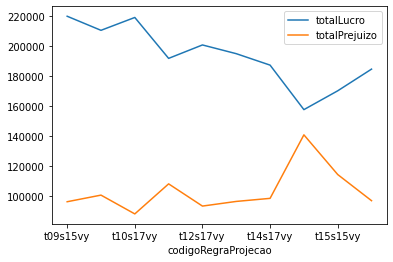

In [53]:
dTotais.plot()

# Por que as quantidade de pontos não são iguais para todos os tipos de Stop/Target ?

# Tentando fazer agrupamento de ações